In [1]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import copy
import time
%matplotlib inline

physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

model_adam = keras.models.Sequential()
model_adam.add(keras.layers.Input(batch_input_shape=(1,1))) # Date de intrare
model_adam.add(keras.layers.Dense(32, activation='relu'))
model_adam.add(keras.layers.Dense(16, activation='relu'))
model_adam.add(keras.layers.Dense(1, activation='linear')) # Date de iesire
model_adam.compile(loss='mse', optimizer='adam', metrics=['mse'])

model_sgd = keras.models.Sequential()
model_sgd.add(keras.layers.Input(batch_input_shape=(1,1))) # Date de intrare
model_sgd.add(keras.layers.Dense(32, activation='relu'))
model_sgd.add(keras.layers.Dense(16, activation='relu'))
model_sgd.add(keras.layers.Dense(1, activation='linear')) # Date de iesire
model_sgd.compile(loss='mse', optimizer='sgd', metrics=['mse'])

def f(x):
    return 1 / (x * x + 1)

xs = np.linspace(-1, 1, 2000)
ys = f(xs)


y_no_train = model_adam.predict(xs)

history = model_adam.fit(xs, ys, epochs=50)
history_sgd = model_sgd.fit(xs, ys, epochs=50)
print(history.params)
print(history.history.keys())

Epoch 1/50
63/63 [==============================] - 1s 6ms/step - loss: 0.3998 - mse: 0.3998
Epoch 2/50
63/63 [==============================] - 0s 7ms/step - loss: 0.0599 - mse: 0.0599
Epoch 3/50
63/63 [==============================] - 0s 6ms/step - loss: 0.0134 - mse: 0.0134
Epoch 4/50
63/63 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024
Epoch 5/50
63/63 [==============================] - 0s 7ms/step - loss: 6.3915e-04 - mse: 6.3915e-04
Epoch 6/50
63/63 [==============================] - 0s 6ms/step - loss: 4.2542e-04 - mse: 4.2542e-04
Epoch 7/50
63/63 [==============================] - 0s 6ms/step - loss: 3.0057e-04 - mse: 3.0057e-04
Epoch 8/50
63/63 [==============================] - 0s 6ms/step - loss: 2.4009e-04 - mse: 2.4009e-04
Epoch 9/50
63/63 [==============================] - 0s 7ms/step - loss: 1.8030e-04 - mse: 1.8030e-04
Epoch 10/50
63/63 [==============================] - 0s 7ms/step - loss: 1.4252e-04 - mse: 1.4252e-04
Epoch 11/50
63/63 [==

In [2]:
model_adam.predict([0])

array([[1.0001168]], dtype=float32)

In [3]:
print(history.history["loss"])

[0.25336769223213196, 0.044886842370033264, 0.009470997378230095, 0.0017061742255464196, 0.0005690146936103702, 0.0003856142866425216, 0.00029225379694253206, 0.00022458223975263536, 0.00017176488472614437, 0.00013260976993478835, 0.00010207188461208716, 7.893008296377957e-05, 6.082480831537396e-05, 4.6136647142702714e-05, 3.412556179682724e-05, 2.54102487815544e-05, 1.907396290334873e-05, 1.4596111213904805e-05, 1.1341758181515615e-05, 9.052909263118636e-06, 7.456821094820043e-06, 6.330796622933121e-06, 5.575246177613735e-06, 5.095436335977865e-06, 4.7101361815293785e-06, 4.401952082844218e-06, 4.140411419939483e-06, 3.9540441321150865e-06, 3.827551608992508e-06, 3.627597379818326e-06, 3.5167199712304864e-06, 3.2940549772320082e-06, 3.1426209261553595e-06, 3.0073927064222516e-06, 2.909809381890227e-06, 2.786125833154074e-06, 2.584976755315438e-06, 2.5259780613851035e-06, 2.5282906790380366e-06, 2.263184342155e-06, 2.204549446105375e-06, 2.1020825897721807e-06, 2.0809741272387328e-06, 

In [4]:
epochs = [i for i in range(1, 51)]
print(epochs)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


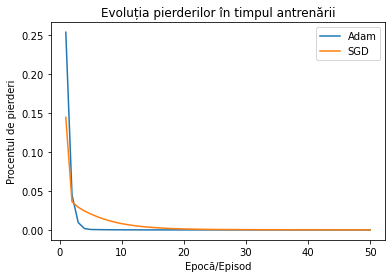

In [5]:
plt.plot(epochs, history.history["mse"], label='Adam')
plt.plot(epochs, history_sgd.history["mse"], label='SGD')
plt.xlabel('Epocă/Episod')
plt.ylabel('Procentul de pierderi')
plt.title('Evoluția pierderilor în timpul antrenării')
plt.legend()
plt.show()

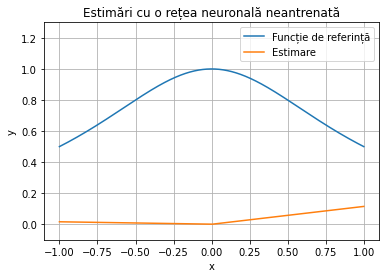

In [14]:
plt.plot(xs, ys, label='Funcție de referință')
plt.plot(xs, y_no_train, label='Estimare')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Estimări cu o rețea neuronală neantrenată')
plt.ylim(-0.1, 1.3)
plt.grid()
plt.legend()
plt.show()

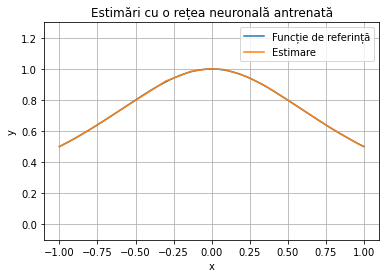

In [16]:
plt.plot(xs, ys, label='Funcție de referință')
plt.plot(xs, model_adam.predict(xs), label='Estimare')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Estimări cu o rețea neuronală antrenată')
plt.grid()
plt.ylim(-0.1, 1.3)
plt.legend()
plt.show()